# Plots for the introduction

To help keep a consisten feel of plots and so on, this document will do any plots used.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

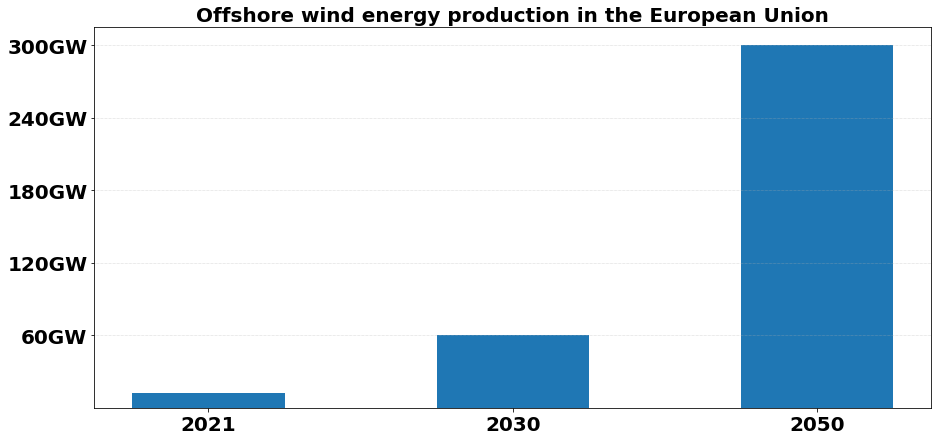

In [16]:
# Source is:
# https://ec.europa.eu/commission/presscorner/detail/en/ip_20_2096

year = np.array(["2021", "2030", "2050"])
gw = np.array([12, 60, 300])
gw_text = np.array(["12GW", "60GW", "300GW"])
gw_test = np.array(["60GW", "120GW","180GW","240GW","300GW"])
gw1 = np.array([60, 120, 180, 240, 300])

fig = plt.gcf()
fig.set_size_inches(15, 7)
ax = plt.gca()

fontsz = 20  #font size

plt.bar(year, gw, width=0.5)


#plt.xlabel("Year", fontsize = 12, fontweight="bold")
#plt.ylabel("Energy production [GW]", fontsize = 12, fontweight="bold")
plt.title("Offshore wind energy production in the European Union", fontsize = fontsz, fontweight="bold")
plt.yticks(gw1, gw_test, fontsize = fontsz, fontweight = "bold")
plt.xticks(fontsize = fontsz, fontweight = "bold")
ax.yaxis.grid(linestyle=':', linewidth=0.5) # vertical lines   #linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}

plt.show()
fig.savefig('kap1/Energy_prod.png', dpi=150)



['gold', 'cornflowerblue', 'darkgrey', 'lightcoral', 'blue', 'red', 'black']

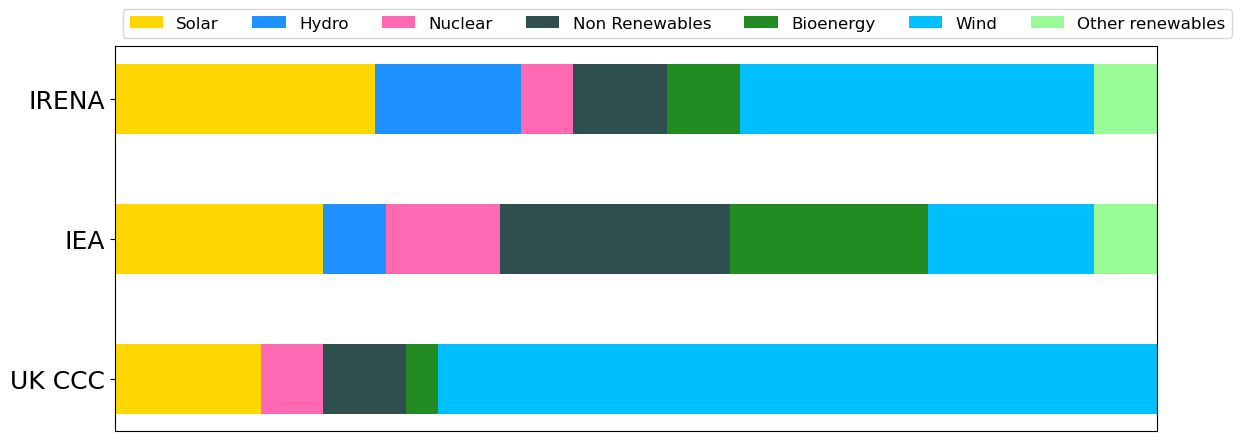

In [29]:
# Define the color names
solarC = "gold"
hydroC = "dodgerblue"
nuclearC = "hotpink"
nonrenC = "darkslategrey"
bioC = "forestgreen"
windC = "deepskyblue"
otherC = "palegreen"

category_names = ["Solar", "Hydro", "Nuclear", "Non Renewables", "Bioenergy", "Wind", "Other renewables"]
results = {
    'IRENA': [25, 14, 5, 9, 7, 34, 6],
    'IEA': [20, 6, 11, 22, 19, 16, 6],
    'UK CCC': [14, 0, 6, 8, 3, 69, 0],
}

cmp = "Paired"   #https://matplotlib.org/stable/tutorials/colors/colormaps.html cmap

# IRENA - Roadmap to 2050 1.5 Degree Celsius Scenario - Global
# IEA - Sustainable development scenario - Global
# UK CCC, Balanced Pathway - UK

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap(cmp)(     
        np.linspace(0.15, 0.85, data.shape[1]))
    
    category_colors = [solarC, hydroC, nuclearC, nonrenC, bioC, windC, otherC]

    fig, ax = plt.subplots(figsize=(13.45, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='large')   #top legend
                            #loc='lower left',
    return fig, ax


survey(results, category_names)
fig = plt.gcf()
plt.yticks(fontsize = 18)
plt.show()
fig.savefig('kap1/Energy_goals.png', dpi=150)

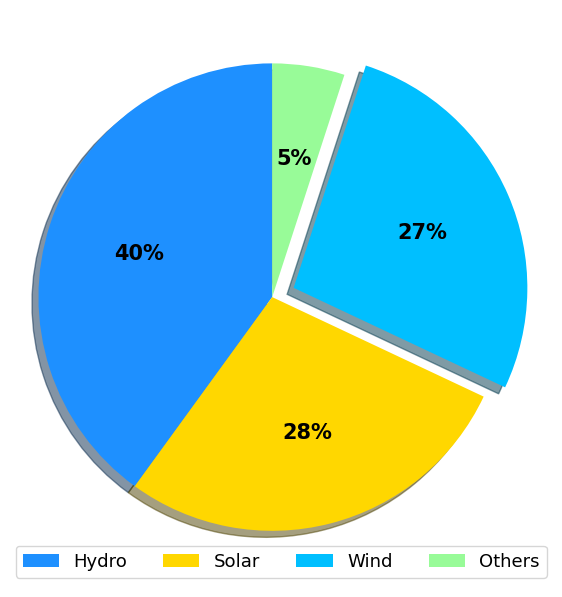

In [30]:
#Source:
# https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2022/Apr/IRENA_-RE_Capacity_Highlights_2022.pdf?la=en&hash=6122BF5666A36BECD5AAA2050B011ECE255B3BC7

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hydro', 'Solar', 'Wind', 'Others'
sizes = [40, 28, 27, 5]
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
mycolors = [hydroC, solarC, windC, otherC]



fig1, ax1 = plt.subplots()

fig1.set_size_inches(7,7.5)
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
#        shadow=True, startangle=90, colors = mycolors, textprops=dict(color="black", size=15, weight="bold"))

ax1.pie(sizes, explode=explode, autopct='%1.0f%%',
        shadow=True, startangle=90, colors = mycolors, textprops=dict(color="black", size=15, weight="bold"))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(labels = labels, ncol = 4, loc="lower center", fontsize=13)

plt.show()
fig1.savefig('kap1/renew_generation.png', dpi=150)